In [55]:
from lib.main_func_p1 import timer, path
from apply_modelos import test_concepto
from lib.main_func_p3 import calculate_onefp
from lib.main_func_p4 import plot_probability_curve

import os
import pandas as pd
import numpy as np

#XGBoost library
import xgboost as xgb

In [56]:
uniprot_id = 'P22303'
path_file = path(uniprot_id)
# Parametros
seed = 142854
fp_name = 'morgan2_c'

In [57]:
smiles_NO_ADME = pd.read_csv(f'{path_file}_02_ligands_smiles_NO_ADME_lipinski.csv')
smiles_NO_ADME['activity'] = 0.0
smiles_NO_ADME.loc[smiles_NO_ADME[smiles_NO_ADME.activity_type == 'Active'].index, 'activity'] = 1.0
smiles_NO_ADME = smiles_NO_ADME[smiles_NO_ADME['activity_type'] != 'Intermediate']
smiles_NO_ADME.drop(['chembl_id_ligand','MW', 'HBA', 'HBD', 'LogP', 'activity_type'], axis=1, inplace=True)
smiles_NO_ADME.activity.value_counts()

1.0    611
0.0    141
Name: activity, dtype: int64

In [58]:
calculate_onefp(smiles_NO_ADME, fp_name)
df_NO_ADME = smiles_NO_ADME.drop(['mol', 'smiles'], axis=1)
df_NO_ADME['type'] = 'NO_ADME_inactive'
df_NO_ADME.loc[df_NO_ADME[df_NO_ADME.activity == 1.0].index, 'type'] = 'NO_ADME_active'
df_NO_ADME = df_NO_ADME[['type', fp_name, 'activity']]
df_NO_ADME.head()

,type,morgan2_c,activity
0,NO_ADME_active,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
1,NO_ADME_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
2,NO_ADME_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
3,NO_ADME_active,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
4,NO_ADME_active,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0


## Carga modelos

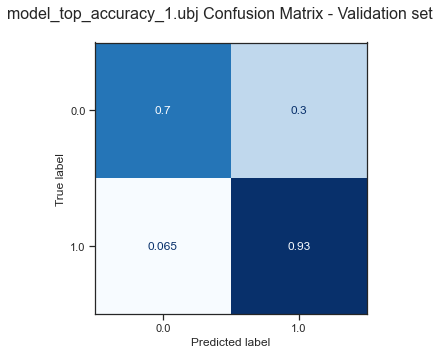

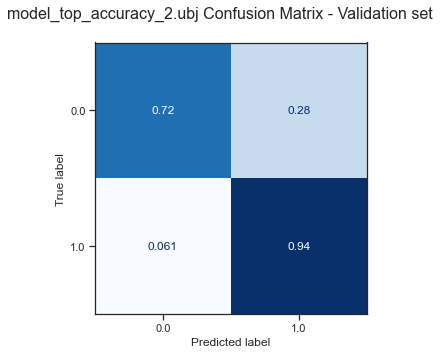

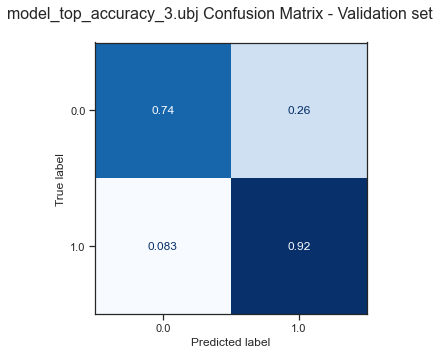

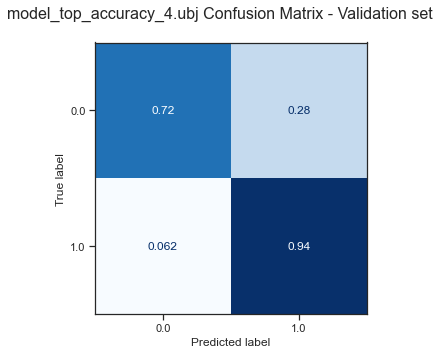

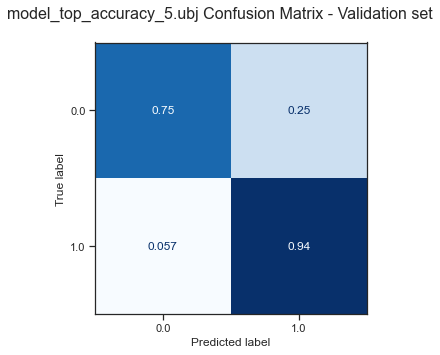

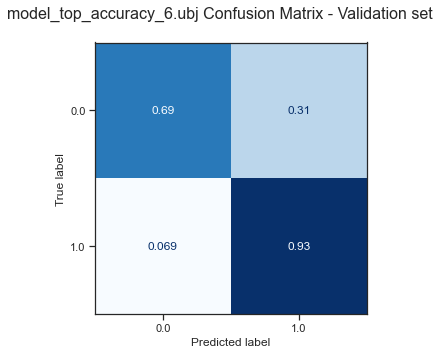

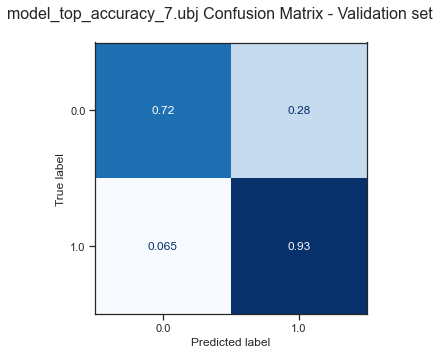

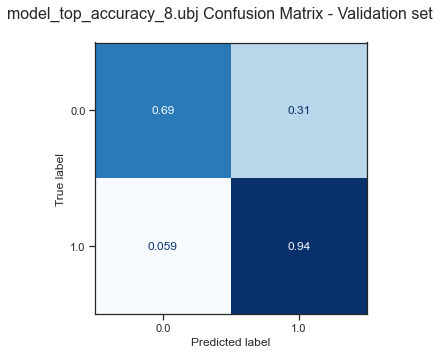

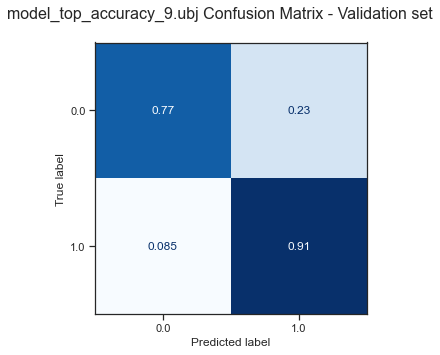

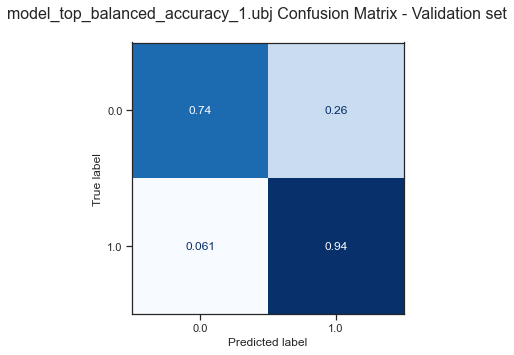

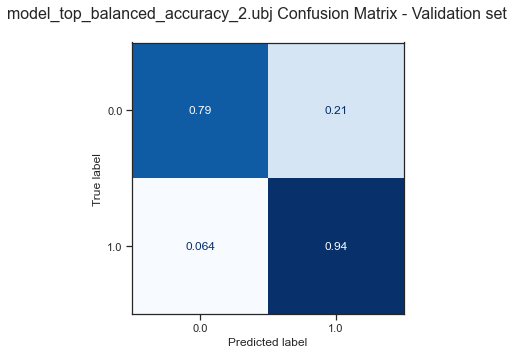

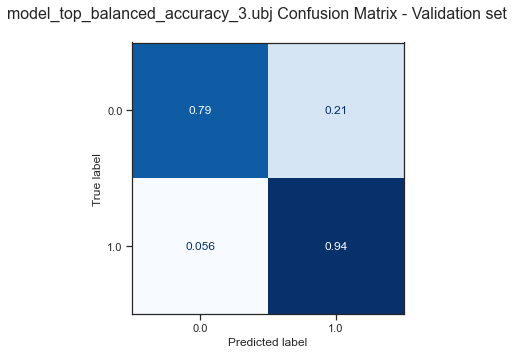

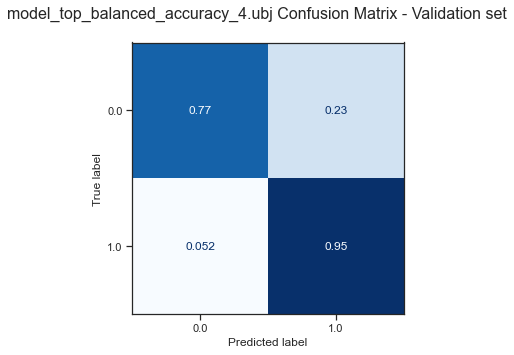

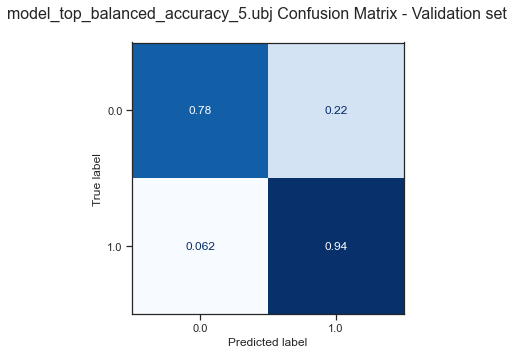

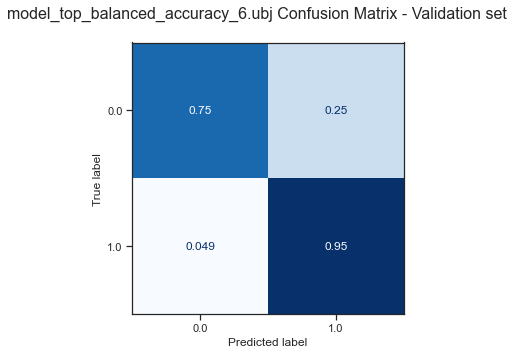

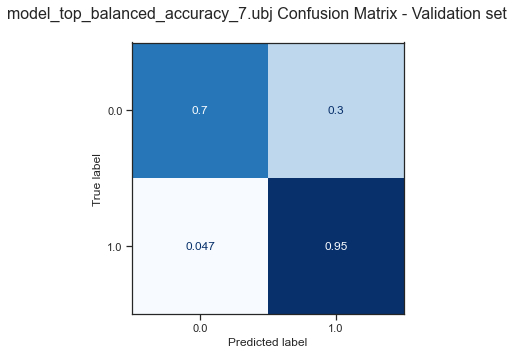

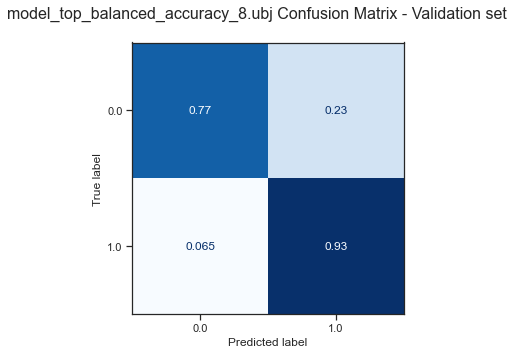

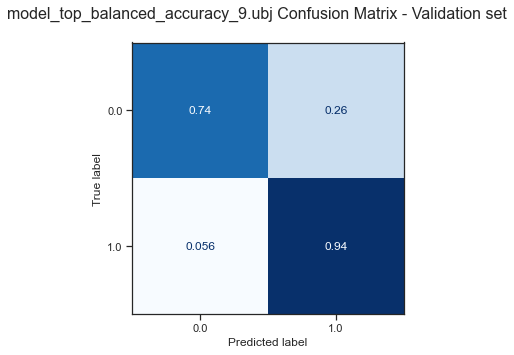

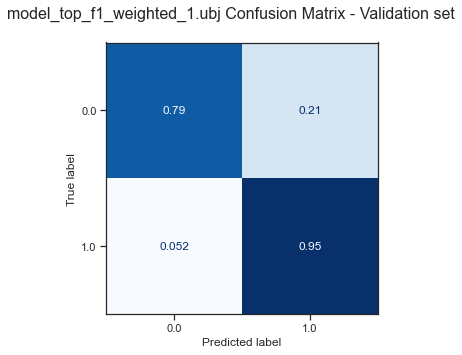

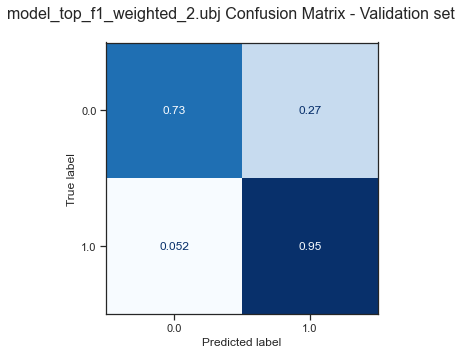

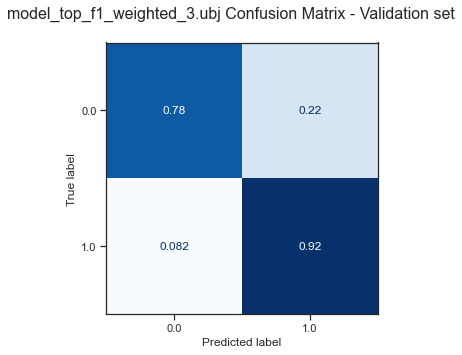

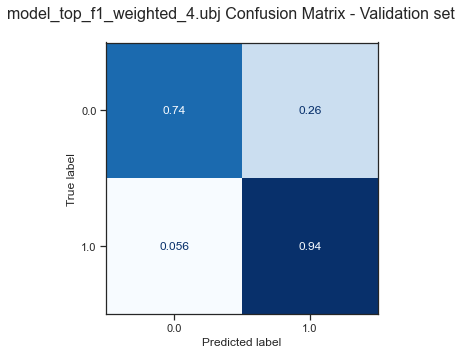

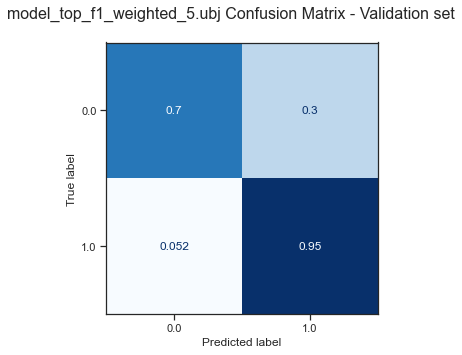

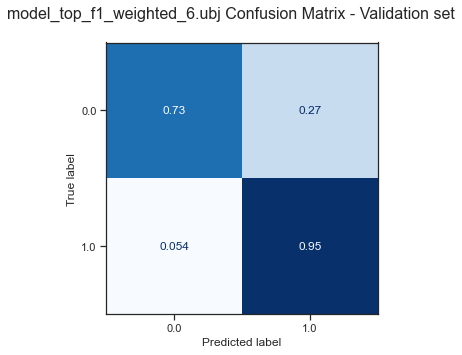

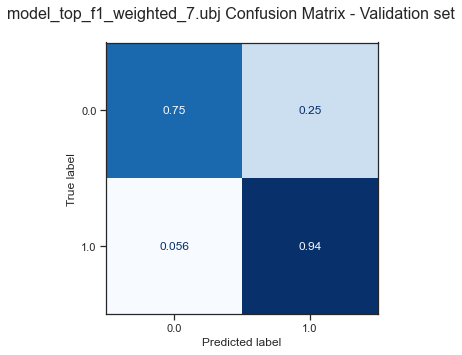

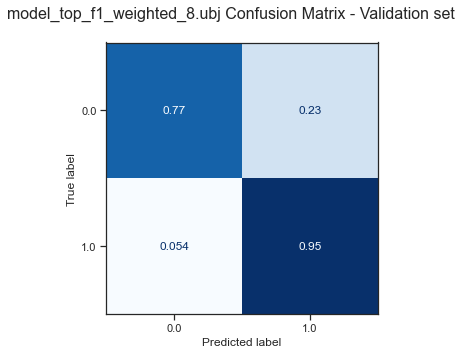

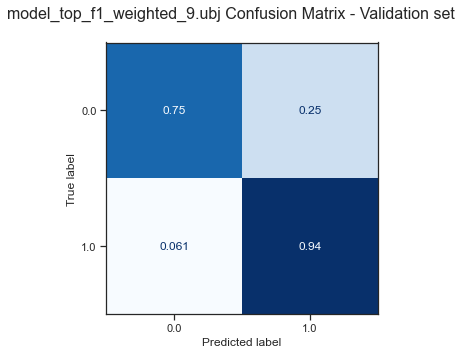

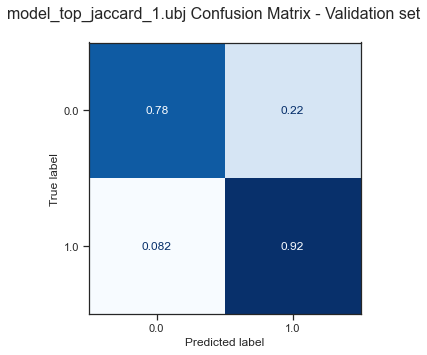

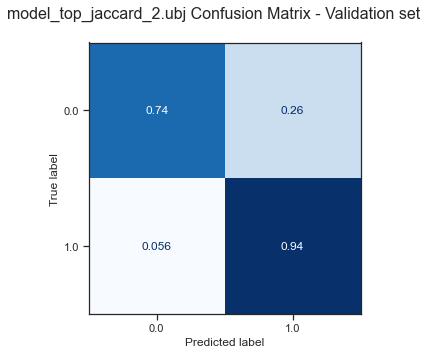

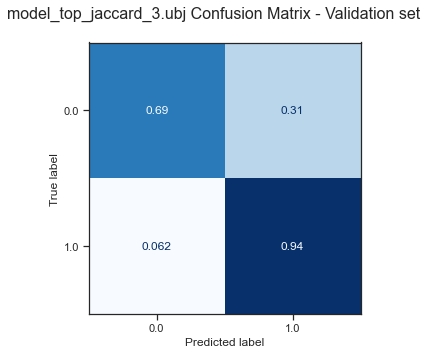

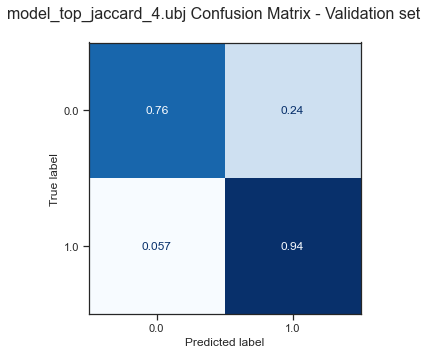

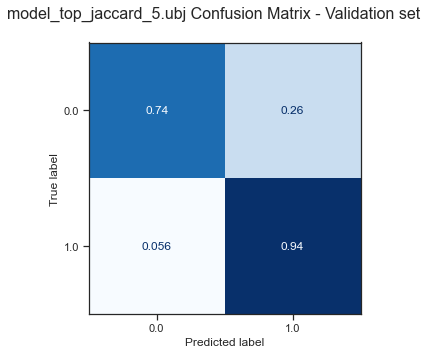

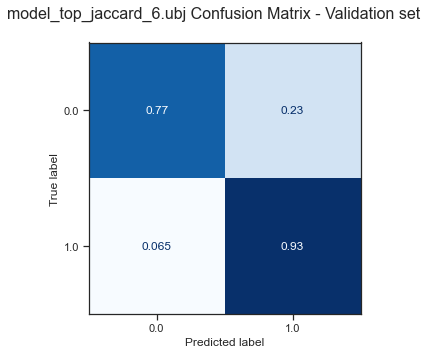

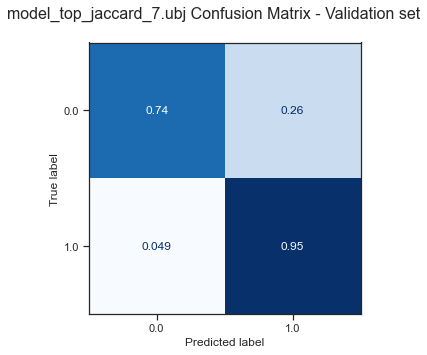

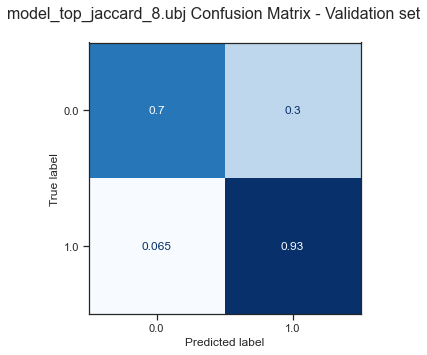

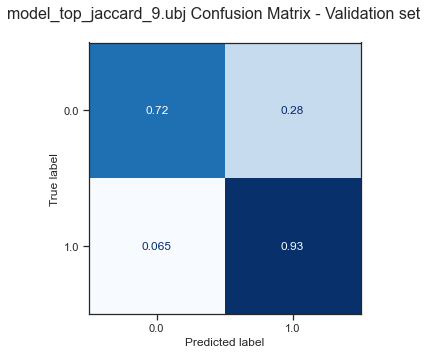

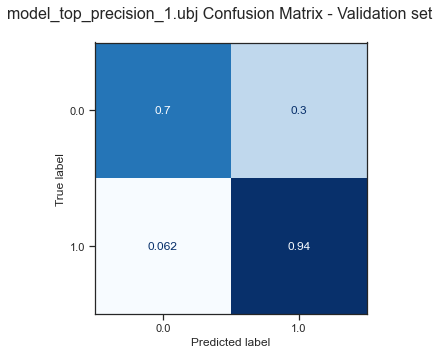

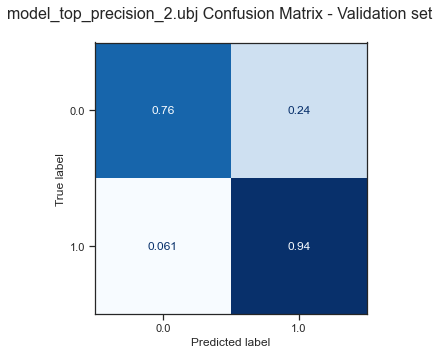

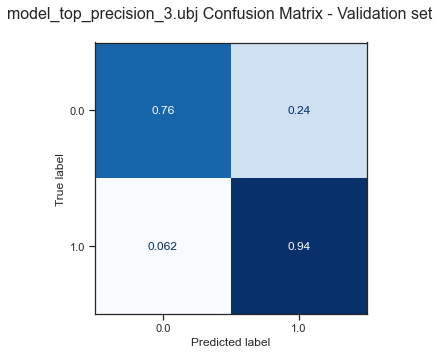

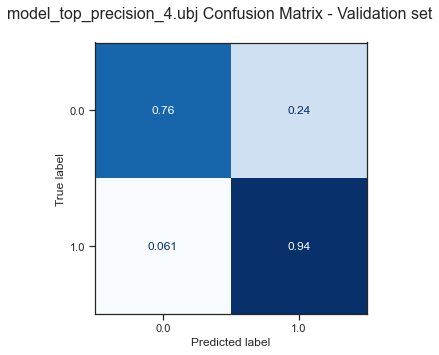

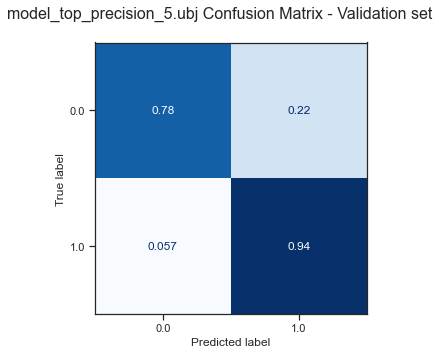

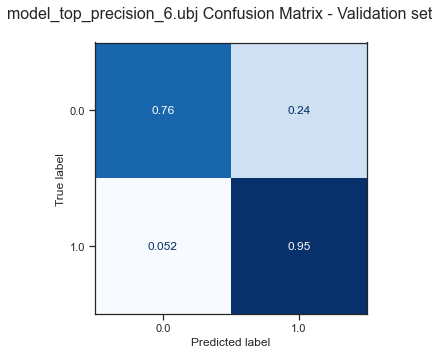

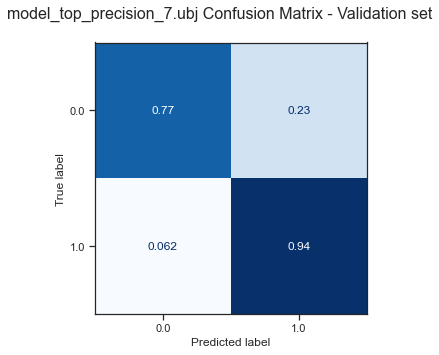

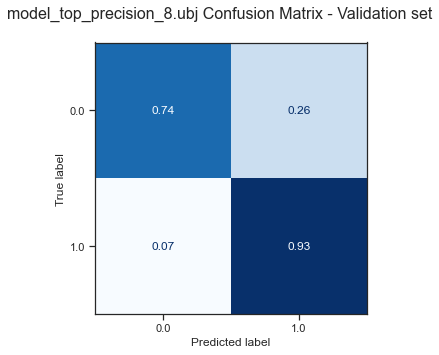

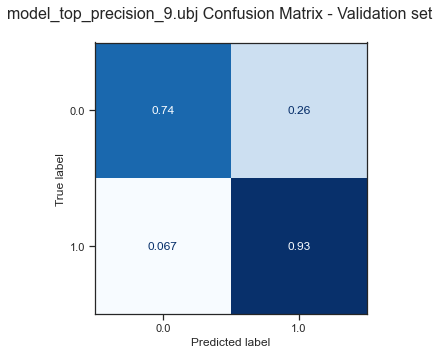

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
X, y = df_NO_ADME[fp_name].tolist(), df_NO_ADME['activity'].tolist()

# Lista modelos a probar
model_list = os.listdir(f'./models_test/{uniprot_id}')

for model in model_list:
    # Instanciar el modelo
    xgbc_tuned = xgb.XGBClassifier()
    # Cargar el modelo
    xgbc_tuned.load_model(f'./models_test/{uniprot_id}/{model}')

    sns.set_theme(style="ticks")
    fig, ax1 = plt.subplots(figsize=(12, 5))
    fig.suptitle(f'{model} Confusion Matrix - Validation set', size=16)
    disp2 = ConfusionMatrixDisplay.from_estimator(xgbc_tuned, X, y,
                                              cmap=plt.cm.Blues, normalize='true',
                                              colorbar=False, ax=ax1)
    plt.show()
    plt.close()